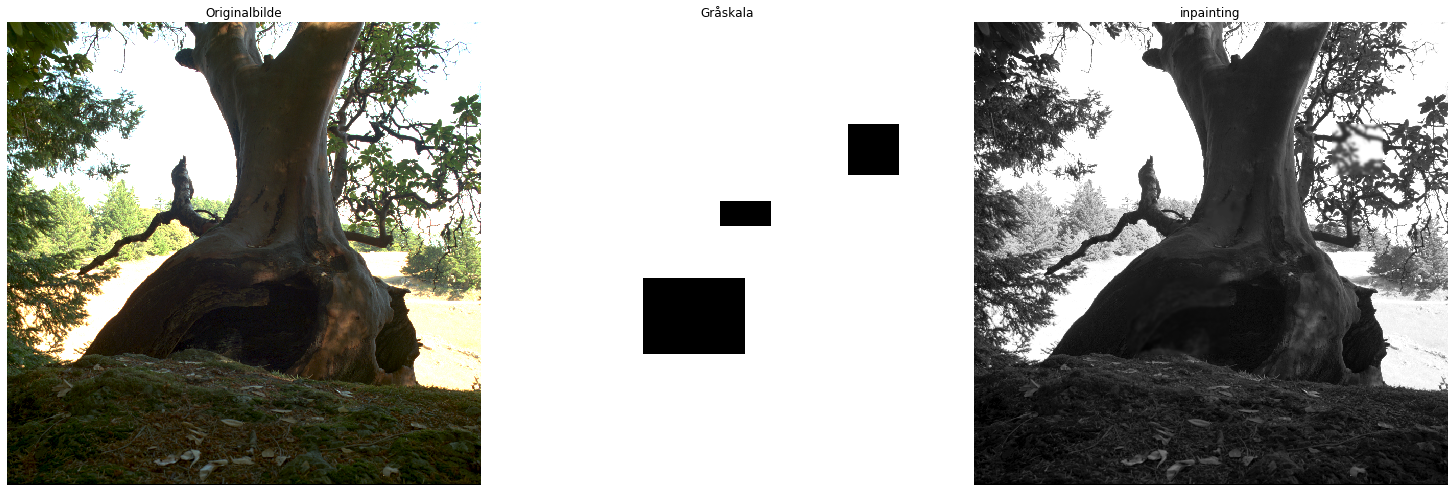

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import eksplisitt as eks
import ImageView as imv
%matplotlib inline

tree='../hdr-bilder/Tree/Tree_00032.png'
orig_im = imageio.imread(tree)
im=np.copy(orig_im)
im = np.sum(im.astype(float), 2) / (3 * 255)  #gråtone
img = np.copy(im)
im[im < 0] = 0                                 # klipp til lovlige verdier
im[im > 1] = 1

mask = np.ones(im.shape)     #lag maske
mask[350:400 ,450:550] = 0
mask[500:650 ,300:500] = 0
mask[200:300 ,700:800] = 0
mask = mask.astype(bool)

im=eks.eksplisitt(im, n=10)  #løs

im[mask] = img[mask]         #ja
imv.viewBW(orig_im, mask, im, "inpainting")

